In [1]:
!pip install pdf2image
!pip install opencv-python
!pip install opencv-contrib-python

  Using cached opencv_contrib_python-4.5.2.52-cp38-cp38-win_amd64.whl (41.5 MB)


In [34]:
import os
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
from pdf2image import convert_from_path

In [2]:
os.environ['PATH'] += r';C:\Users\Пажилой биофизик\Downloads\poppler-0.68.0_x86\poppler-0.68.0\bin'
os.environ['PATH'] += r';C:\Program Files\Tesseract-OCR'

In [7]:
images = convert_from_path(r'C:\Users\Пажилой биофизик\Downloads\2.pdf')
for i, image in enumerate(images):
    fname = 'image'+str(i)+'.png'
    image.save(fname, "PNG")

In [23]:
img = cv2.imread('1.png')
img_ = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)[1]
img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)

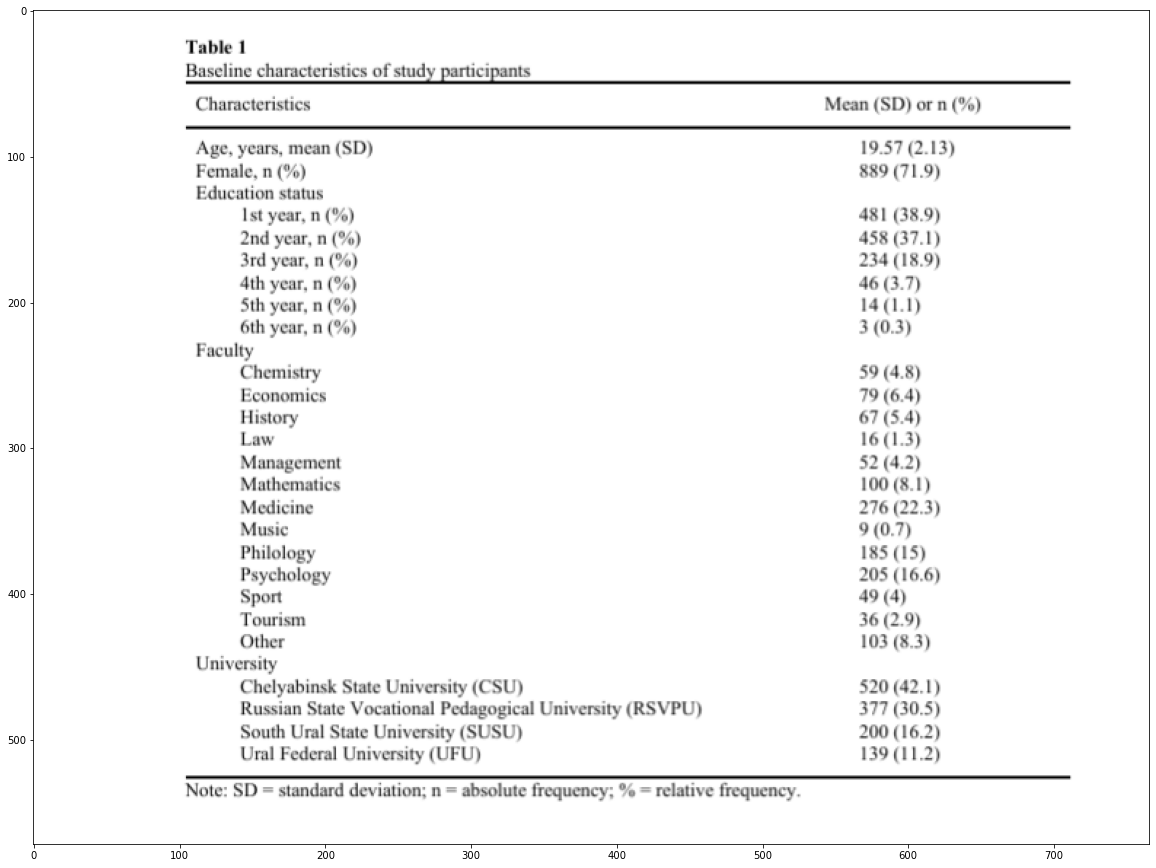

In [24]:
plt.figure(figsize=[20, 20])
plt.imshow(img, cmap='gray')

In [37]:
res1 = pytesseract.image_to_string(img, lang='rus')

In [28]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel(r'ESPCN\ESPCN_x3.pb')
sr.setModel('espcn', 3)

upsc = sr.upsample(img)

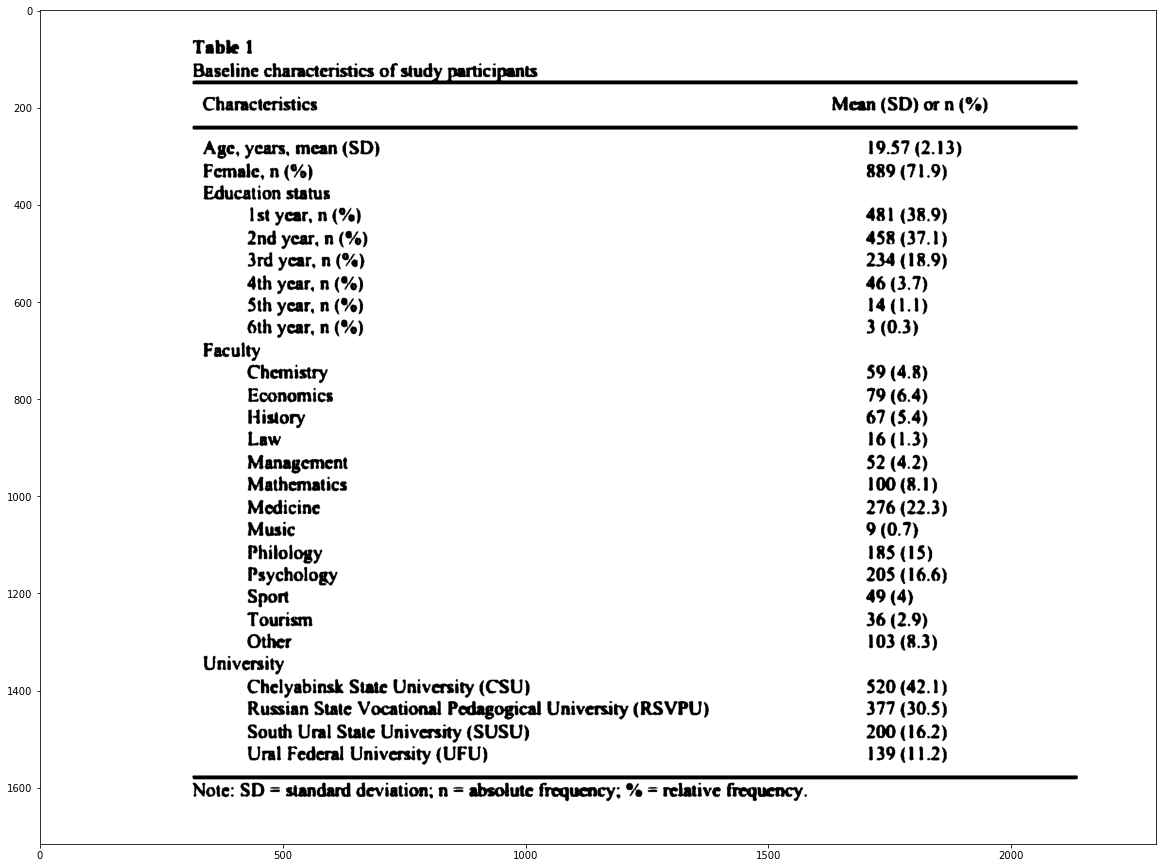

In [29]:
upsc_ = cv2.threshold(upsc, 200, 255, cv2.THRESH_BINARY)[1]
upsc_ = cv2.cvtColor(upsc_, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=[20, 20])
plt.imshow(upsc_, cmap='gray')

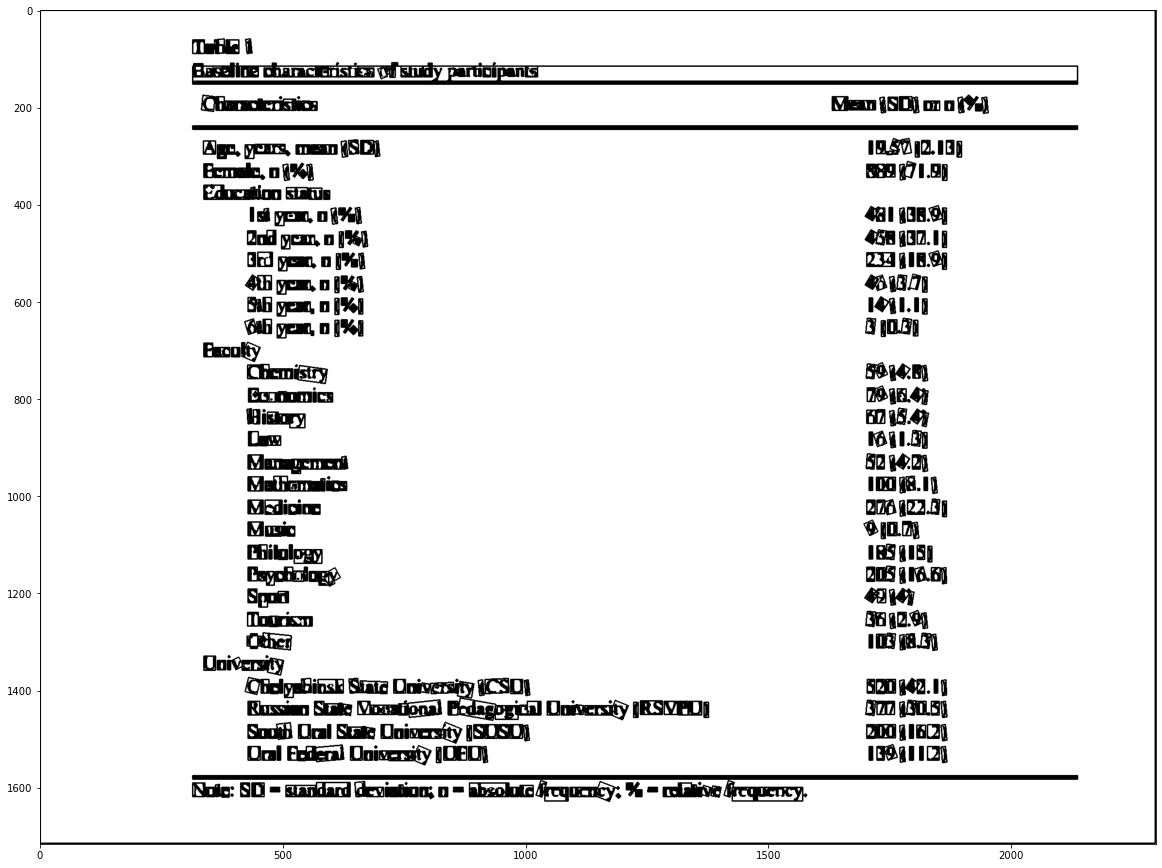

In [36]:
contours0, hierarchy = cv2.findContours(upsc_.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
# перебираем все найденные контуры в цикле
for cnt in contours0:
    rect = cv2.minAreaRect(cnt) # пытаемся вписать прямоугольник
    box = cv2.boxPoints(rect) # поиск четырех вершин прямоугольника
    box = np.int0(box) # округление координат
    cv2.drawContours(upsc_,[box],0,(0,255,0),2) # рисуем прямоугольник

plt.figure(figsize=[20, 20])
plt.imshow(upsc_, cmap='gray')

In [23]:
cv2.destroyAllWindows()